# Projekat 1 - nadgledano učenje

**Dataset:** http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

**Definicija problema:** Na osnovu parametara sa senzora za temperaturu, vlažnost vazduha, koncentraciju CO2 i osvetljenja odrediti da li je u prostoriji prisutna neka osoba.

**Vrsta problema:** binarna klasifikacija

## Podaci o datasetu

Izabrani dataset sadrži *time-series* podatke očitane sa senzora postavljenih u jednoj kancelariji. 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="darkgrid")

data = pd.read_csv("occupancy_data/datatest2.txt", sep=',')
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.7600,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.7900,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.7900,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.7900,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.7900,31.463333,437.333333,1027.333333,0.005084,1


##### Broj uzoraka:

In [3]:
len(data)

9752

### Atributi dataseta

1. **_Date_** - Datum i vreme merenja.
2. **_Temperature_** - Temperatura u prostoriji izražena u stepenima Celzijusa. Kontinualne numeričke vrednosti.
3. **_Humidity_** - Vlažnost vazduha izražena u procentima. Kontinualne numeričke vrednosti.
4. **_Light_** - Osvetljenje u prostoriji izraženo u luksima. Kontinualni numerički podatak.
5. **_CO2_** - Koncentracija ugljen-dioksida u prostoriji izražena u ppm (*parts per million*). Kontinualni numerički podatak.
6. **_HumidityRatio_** - Odnos *kgwater-vapor/kg-air* (broj kilograma vodene pare po kilogramu vazduha). Kontinualni numerički podatak.
7. **_Occupancy_** - Binarni podatak koji govori da li u prostoriji ima nekog ili je prazna.

### Deskriptivna analiza dataseta

Sledeći isečak koda prikazuje distribuciju klasa u datasetu:

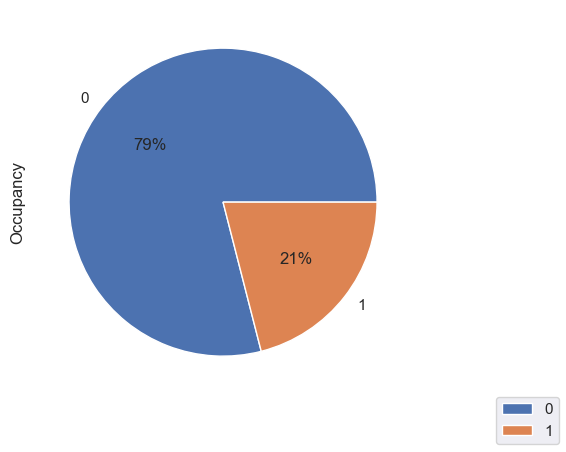

In [4]:
plt.figure(figsize=(7, 5))
pie = data.Occupancy.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.savefig("graphs/classdistribution.jpg")
plt.show()

Na dijagramu se može videti distribucija klasa u skupu podataka. Plavi deo dijagrama odgovara vrednosti 0 koja kodira stanje prazne prostorije, dok narandžasti deo odgovara vrednosti 1 koja kodira prisutnost osobe u prostoriji. Ovo su dve klase kojima jedan uzorak može da pripada, a cilj projekta biće razvijanje modela koji podatak klasifikuje u jednu od ove dve klase.

In [7]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


Vrednosti za Light i CO2 imaju najveći opseg, pa je korisno ispitati njihovu distribuciju.

##### *Skewness plot* za Light:

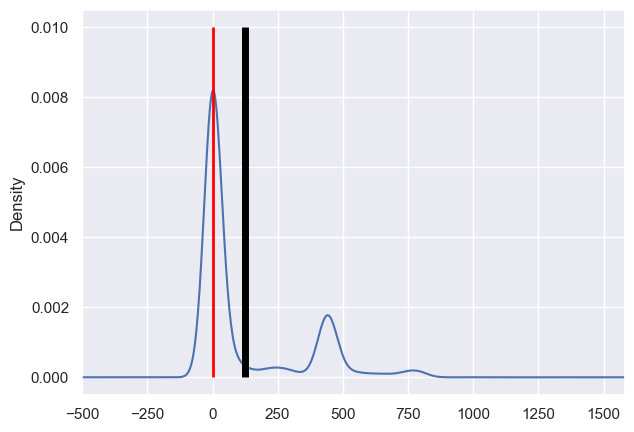

In [26]:
skewplot = data.Light.plot(kind="density",
              figsize=(7,5),
              xlim=(data.Light.min()- 500,data.Light.max()));
plt.vlines(data.Light.mean(), 
           ymin=0, 
           ymax=0.01,
           linewidth=5.0,
           color="black");
plt.vlines(data.Light.median(),
           ymin=0, 
           ymax=0.01, 
           linewidth=2.0,
           color="red");

plt.savefig("graphs/skewplot-light.jpg")
plt.show()

##### *Boxplot* za Light:

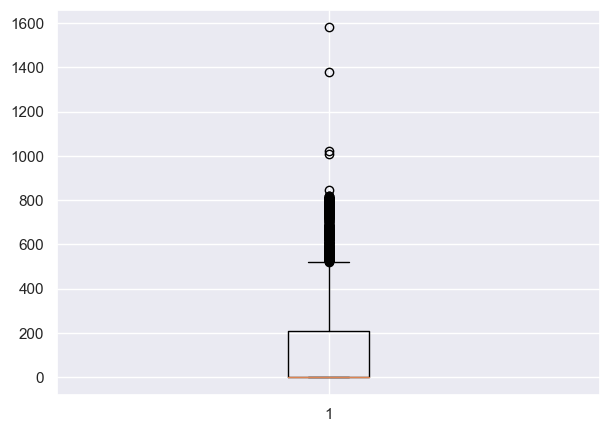

In [24]:
plt.figure(figsize=(7, 5))
boxplot = plt.boxplot(data.Light)
plt.savefig("graphs/boxplot-light.jpg")
plt.show()

##### *Skewness plot* za CO2:

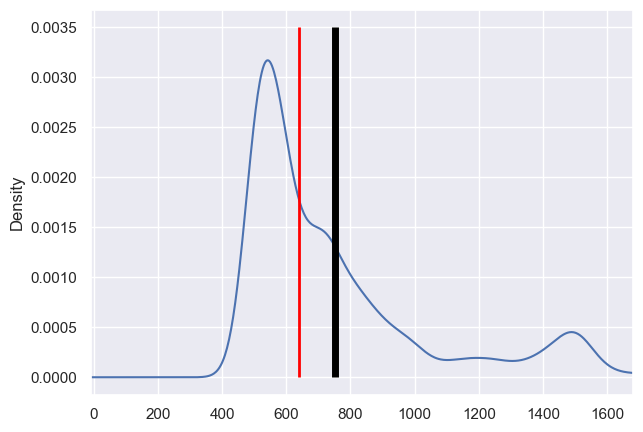

In [33]:
skewplot = data.CO2.plot(kind="density",
              figsize=(7,5),
              xlim=(data.Light.min()- 10,data.Light.max() + 100));
plt.vlines(data.CO2.mean(), 
           ymin=0, 
           ymax=0.0035,
           linewidth=5.0,
           color="black");
plt.vlines(data.CO2.median(),
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="red");

plt.savefig("graphs/skewplot-CO2.jpg")
plt.show()

##### *Boxplot* za CO2:

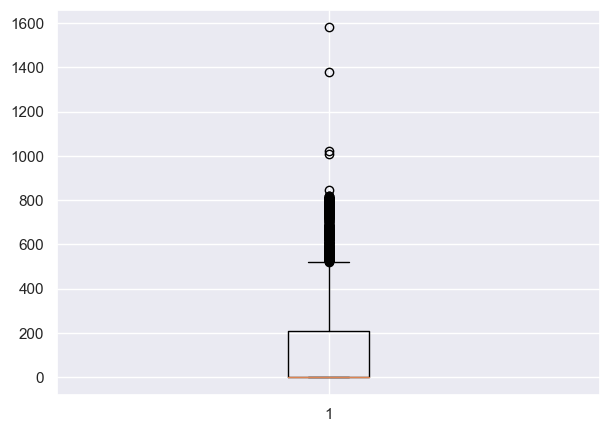

In [32]:
plt.figure(figsize=(7, 5))
boxplot = plt.boxplot(data.Light)
plt.savefig("graphs/boxplot-CO2.jpg")
plt.show()

Na osnovu ova 4 grafika može se primetiti da ovi atributi imaju značajan broj *outlier*-a.